## Handling Missing Values

In [86]:
import pandas as pd
import os

In [87]:
data = pd.read_csv('Train.csv')

In [88]:
print(data.head())

  Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier

In [89]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [90]:
missing_values = data.isnull().sum()


## Calculates the total number of missing values for each column in the dataset.


In [92]:
print("Missing values per column:")
print(missing_values)

Missing values per column:
Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


In [93]:
data['Item_Weight'] = data['Item_Weight'].fillna(data.groupby('Item_Type')['Item_Weight'].transform('median'))


In [94]:
mode_outlet_size = data.groupby('Outlet_Type')['Outlet_Size'].apply(lambda x: x.mode()[0] if not x.mode().empty else None)
data['Outlet_Size'] = data.groupby('Outlet_Type')['Outlet_Size'].transform(lambda x: x.fillna(mode_outlet_size[x.name]))


- **First line**: Finds the most common `Outlet_Size` for each `Outlet_Type`.
- **Second line**: Fills missing `Outlet_Size` values with the calculated mode.

It's filling missing sizes based on type.


In [96]:
# Check for missing values again
print(data.isnull().sum())


Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64


In [97]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seaborn: A Data Visualization Library

- **Purpose**: Seaborn is used for **statistical data visualization**.
- **Key Features**:
  - **Built on Matplotlib**: Provides a high-level interface for drawing attractive graphics.
  - **Easy to Use**: Simplifies the creation of complex visualizations.
  - **Data Handling**: Works well with pandas DataFrames.
  - **Statistical Functions**: Integrates with statistical functions for better insights.

## Common Uses
- **Heatmaps**
- **Boxplots**
- **Pairplots**


In [99]:
print("\nTask 1: Distribution of Sales by Item Type")


Task 1: Distribution of Sales by Item Type


In [100]:
# Grouping data by 'Item_Type' and summing the sales to get total sales for each item type
item_sales = data.groupby('Item_Type')['Item_Outlet_Sales'].sum().sort_values(ascending=False)
print("\nSales by Item Type:\n", item_sales)


Sales by Item Type:
 Item_Type
Fruits and Vegetables    2.820060e+06
Snack Foods              2.732786e+06
Household                2.055494e+06
Frozen Foods             1.825735e+06
Dairy                    1.522594e+06
Canned                   1.444151e+06
Baking Goods             1.265525e+06
Health and Hygiene       1.045200e+06
Meat                     9.175656e+05
Soft Drinks              8.928977e+05
Breads                   5.532372e+05
Hard Drinks              4.577934e+05
Starchy Foods            3.514013e+05
Others                   3.255176e+05
Breakfast                2.322990e+05
Seafood                  1.488682e+05
Name: Item_Outlet_Sales, dtype: float64


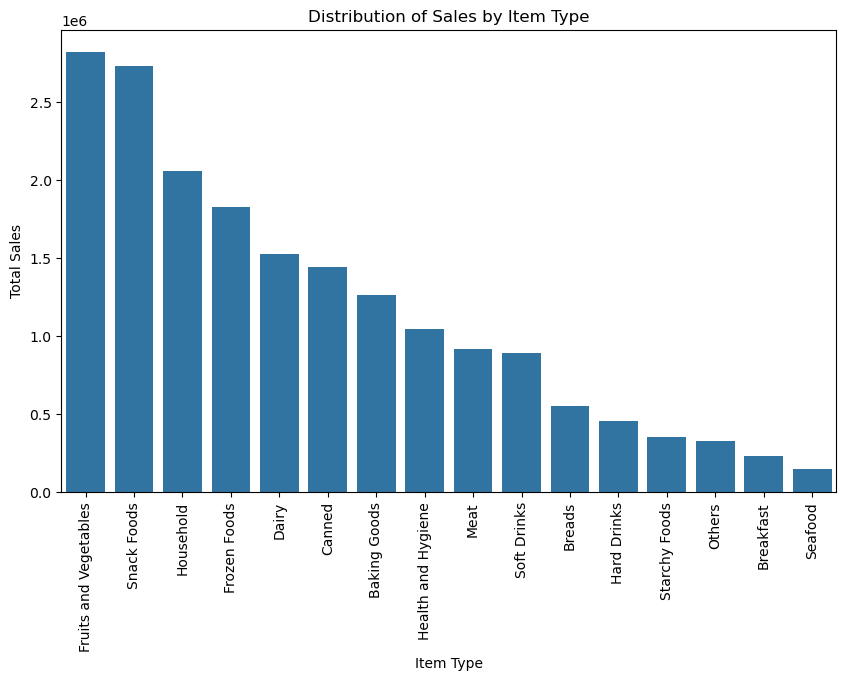

In [101]:
# Visualization: Bar Plot for Distribution of Sales by Item Type
plt.figure(figsize=(10,6))
sns.barplot(x=item_sales.index, y=item_sales.values)
plt.xticks(rotation=90)
plt.title('Distribution of Sales by Item Type')
plt.xlabel('Item Type')
plt.ylabel('Total Sales')
plt.show()

In [102]:
# Observation for Task 1
# The observation would include identifying which item types generate the most sales.
top_item_type = item_sales.idxmax()
print(f"Observation: The item type '{top_item_type}' generates the highest sales.")

Observation: The item type 'Fruits and Vegetables' generates the highest sales.


In [103]:
# Task 2: Sales Performance by Outlet Establishment Year
print("\nTask 2: Sales Performance by Outlet Establishment Year")
# Grouping data by 'Outlet_Establishment_Year' and calculating the mean sales
yearly_sales = data.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].mean().sort_values()
print("\nAverage Sales by Outlet Establishment Year:\n", yearly_sales)


Task 2: Sales Performance by Outlet Establishment Year

Average Sales by Outlet Establishment Year:
 Outlet_Establishment_Year
1998     339.351662
2009    1995.498739
2002    2192.384798
1997    2277.844267
1987    2298.995256
2007    2340.675263
1999    2348.354635
2004    2438.841866
1985    2483.677474
Name: Item_Outlet_Sales, dtype: float64


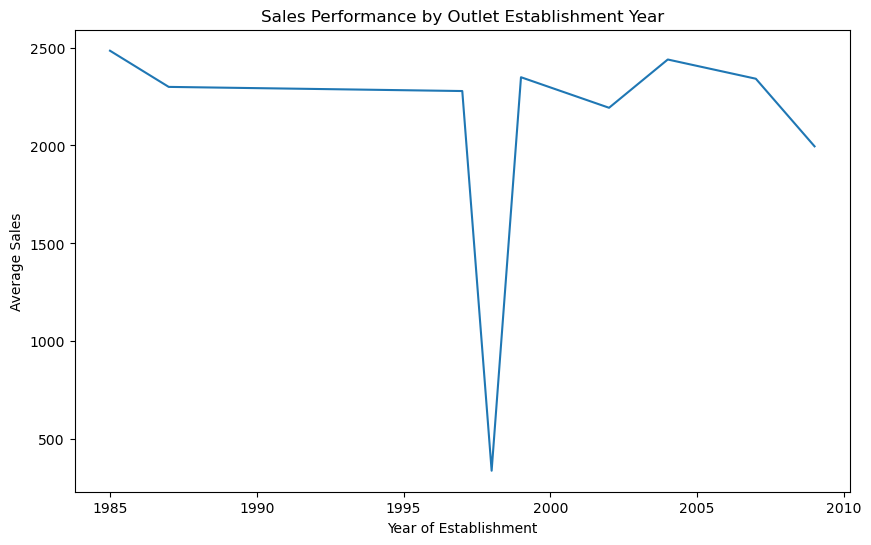

In [104]:
# Visualization: Line Plot for Sales Performance by Outlet Establishment Year
plt.figure(figsize=(10,6))
sns.lineplot(x=yearly_sales.index, y=yearly_sales.values)
plt.title('Sales Performance by Outlet Establishment Year')
plt.xlabel('Year of Establishment')
plt.ylabel('Average Sales')
plt.show()


In [105]:
# Observation for Task 2
# Observing how sales vary with the outlet's year of establishment.
best_year = yearly_sales.idxmax()
print(f"Observation: Outlets established in the year '{best_year}' have the highest average sales.")

Observation: Outlets established in the year '1985' have the highest average sales.


In [106]:
# Task 3: Sales Distribution Across Outlet Types
print("\nTask 3: Sales Distribution Across Outlet Types")
# Grouping data by 'Outlet_Type' and calculating sales statistics
outlet_sales_stats = data.groupby('Outlet_Type')['Item_Outlet_Sales'].describe()
print("\nSales Statistics by Outlet Type:\n", outlet_sales_stats)



Task 3: Sales Distribution Across Outlet Types

Sales Statistics by Outlet Type:
                     count         mean          std       min         25%  \
Outlet_Type                                                                 
Grocery Store      1083.0   339.828500   260.851582   33.2900   153.79980   
Supermarket Type1  5577.0  2316.181148  1515.965558   73.2380  1151.16820   
Supermarket Type2   928.0  1995.498739  1375.932889   69.2432   981.55565   
Supermarket Type3   935.0  3694.038558  2127.760054  241.6854  2044.33890   

                         50%         75%         max  
Outlet_Type                                           
Grocery Store       256.9988   458.73620   1775.6886  
Supermarket Type1  1990.7420  3135.91800  10256.6490  
Supermarket Type2  1655.1788  2702.64865   6768.5228  
Supermarket Type3  3364.9532  4975.52340  13086.9648  


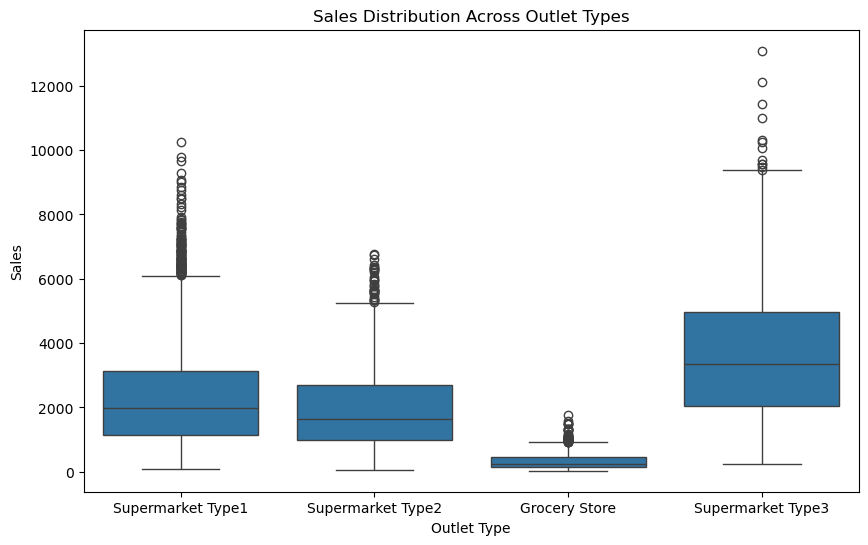

In [107]:
# Visualization: Box Plot for Sales Distribution Across Outlet Types
plt.figure(figsize=(10,6))
sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data=data)
plt.title('Sales Distribution Across Outlet Types')
plt.xlabel('Outlet Type')
plt.ylabel('Sales')
plt.show()

In [108]:
# Observation for Task 3
# Checking which outlet types show the highest sales distribution.
most_sales_outlet_type = data.groupby('Outlet_Type')['Item_Outlet_Sales'].mean().idxmax()
print(f"Observation: '{most_sales_outlet_type}' outlets tend to have the highest average sales.")

Observation: 'Supermarket Type3' outlets tend to have the highest average sales.


In [109]:
# Task 4: Effect of Outlet Size on Sales
print("\nTask 4: Effect of Outlet Size on Sales")
# Grouping data by 'Outlet_Size' and calculating the mean sales
size_sales = data.groupby('Outlet_Size')['Item_Outlet_Sales'].mean().sort_values(ascending=False)
print("\nAverage Sales by Outlet Size:\n", size_sales)


Task 4: Effect of Outlet Size on Sales

Average Sales by Outlet Size:
 Outlet_Size
Medium    2681.603542
High      2298.995256
Small     1867.182814
Name: Item_Outlet_Sales, dtype: float64


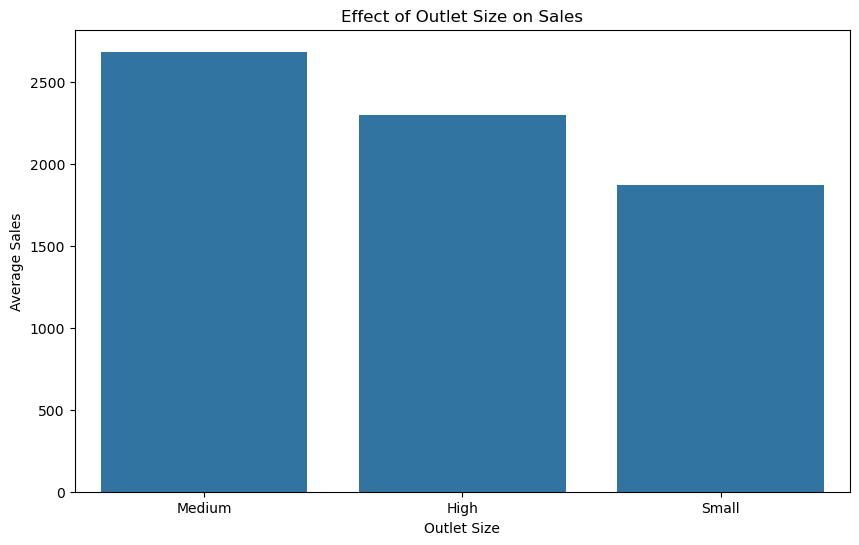

In [110]:
# Visualization: Bar Plot for Effect of Outlet Size on Sales
plt.figure(figsize=(10,6))
sns.barplot(x=size_sales.index, y=size_sales.values)
plt.title('Effect of Outlet Size on Sales')
plt.xlabel('Outlet Size')
plt.ylabel('Average Sales')
plt.show()

In [111]:
# Observation for Task 4
# Observing how the size of an outlet impacts sales.
top_outlet_size = size_sales.idxmax()
print(f"Observation: Large outlets generate the highest average sales, with '{top_outlet_size}' size outlets performing best.")

Observation: Large outlets generate the highest average sales, with 'Medium' size outlets performing best.


In [112]:
# Task 5: Relationship Between Item MRP and Sales
print("\nTask 5: Relationship Between Item MRP and Sales")


Task 5: Relationship Between Item MRP and Sales


In [113]:
# Checking correlation between 'Item_MRP' and 'Item_Outlet_Sales'
correlation = data['Item_MRP'].corr(data['Item_Outlet_Sales'])
print(f"Correlation between Item MRP and Sales: {correlation:.2f}")

Correlation between Item MRP and Sales: 0.57


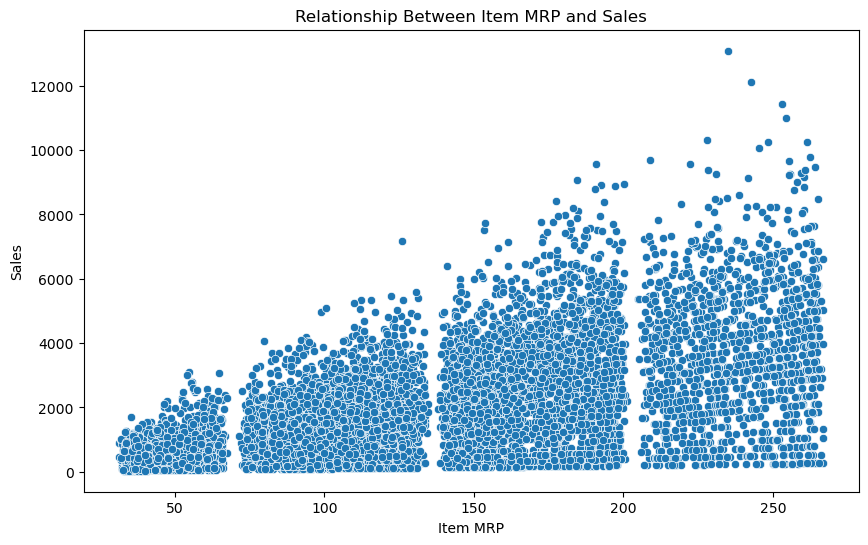

In [114]:
# Visualization: Scatter Plot for Relationship Between Item MRP and Sales
plt.figure(figsize=(10,6))
sns.scatterplot(x='Item_MRP', y='Item_Outlet_Sales', data=data)
plt.title('Relationship Between Item MRP and Sales')
plt.xlabel('Item MRP')
plt.ylabel('Sales')
plt.show()


In [115]:
#Observation for Task 5
# Observing the correlation between MRP and sales to see if higher-priced items result in higher sales.
if correlation > 0:
    print(f"Observation: There is a positive correlation between Item MRP and Sales (Correlation = {correlation:.2f}). Higher priced items tend to generate more sales.")
else:
    print(f"Observation: There is a weak or negative correlation (Correlation = {correlation:.2f}), meaning MRP has little or no effect on sales.")

Observation: There is a positive correlation between Item MRP and Sales (Correlation = 0.57). Higher priced items tend to generate more sales.


## Outliers

**Outliers** are data points that differ significantly from the rest of the dataset. They can occur due to variability in the data or may indicate measurement errors. Outliers are important for several reasons:

- **Impact on Analysis**: Outliers can skew statistical analyses, affecting measures such as the mean and standard deviation.
- **Insight into Data**: They may provide valuable insights into variability, trends, or anomalies within the dataset.
- **Identification**: Outliers can be identified using visualizations like boxplots and scatter plots or through statistical methods such as the Z-score or IQR method.
- **Handling Outliers**: Depending on the analysis context, outliers can be retained, removed, or treated using various techniques.

Understanding and addressing outliers is crucial for accurate data analysis and interpretation.


## Types of Outliers

Outliers can be categorized into several types based on their characteristics and the context in which they occur:

1. **Point Outliers**: 
   - Individual observations that lie far away from the majority of the data points.
   - Example: A single test score significantly higher or lower than the rest.

2. **Contextual Outliers**:
   - Data points that are considered outliers in a specific context but may not be outliers in another.
   - Example: A temperature reading of 100°F may be normal in summer but an outlier in winter.

3. **Collective Outliers**:
   - A group of observations that deviate significantly from the overall dataset. 
   - Example: A sudden spike in sales over a short period due to a marketing campaign.

4. **Univariate Outliers**:
   - Outliers that are identified based on a single variable.
   - Example: A value that is much higher or lower than the rest in a dataset of heights.

5. **Multivariate Outliers**:
   - Outliers that are identified based on the relationships between multiple variables.
   - Example: A data point that doesn't fit well within the expected distribution of two correlated variables.

Understanding the different types of outliers is crucial for effective data analysis and decision-making.


In [117]:
# Calculate the mean of non-zero Item_Visibility
non_zero_mean = data.loc[data['Item_Visibility'] > 0, 'Item_Visibility'].mean()
print("The mean of non-zero Item_Visibility is:", non_zero_mean)

# Replace zero values with the calculated mean
data['Item_Visibility'] = data['Item_Visibility'].replace(0, non_zero_mean)


The mean of non-zero Item_Visibility is: 0.07048184085069402


In [118]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.070482,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.070482,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [119]:
from sklearn.preprocessing import LabelEncoder

# List of columns to apply LabelEncoder
categ = ['Outlet_Size', 'Outlet_Location_Type']

# Initialize LabelEncoder
le = LabelEncoder()

# Apply Label Encoding only to 'Outlet_Size' and 'Outlet_Location_Type'
data[categ] = data[categ].apply(le.fit_transform)

# Display the first few rows to check the result
print(data.head())


  Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.070482   
4           NCD19         8.93          Low Fat         0.070482   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year  Outlet_Size  Outlet_Location_Type  \
0                       1999            1                     0   
1                       2009            1                     2   
2                       1999            1            

In [120]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,1,0,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,1,0,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.070482,Fruits and Vegetables,182.0950,OUT010,1998,2,2,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.070482,Household,53.8614,OUT013,1987,0,2,Supermarket Type1,994.7052
